<a href="https://colab.research.google.com/github/skywalker0803r/deep-learning-ian-goodfellow/blob/master/MMD_LOSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

# 製作一個轉換器可以將分布X轉換成分布Z

# RBF KERNEL

![picture](https://wikimedia.org/api/rest_v1/media/math/render/svg/90dd630ca47f8e24a662189a0a9a38678bdd8f4d)

In [2]:
def rbf_kernel(x1,x2,sigma=1):
  X12norm = torch.sum(x1**2,dim=1,keepdims=True) - 2*x1@x2.T + torch.sum(x2**2,dim=1,keepdims=True).T
  return torch.exp(-X12norm/(2*sigma**2))

# MMD LOSS

![picture](https://images3.programmersought.com/684/25/257d8905b21d793f04d9863574e706e4.png)

In [3]:
def mmd_loss(x,y,kernel=rbf_kernel):
  m,n= x.shape[1],y.shape[1]
  XX = kernel(x,x).sum() / m**2
  XY = kernel(x,y).sum() / m*n
  YY = kernel(y,y).sum() / n**2
  return XX - 2*XY + YY

# 訓練前先把三種分布視覺化


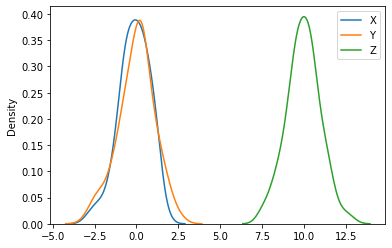

In [4]:
X = np.random.normal(size=(100,1))
Y = np.random.normal(size=(100,1))
Z = np.random.normal(loc=10.0,size=(100,1))
sns.distplot(X,label='X',hist=False)
sns.distplot(Y,label='Y',hist=False)
sns.distplot(Z,label='Z',hist=False)
plt.legend()
plt.show()

In [5]:
X = torch.FloatTensor(X)
Y = torch.FloatTensor(Y)
Z = torch.FloatTensor(Z)
print('X,Y loss 應該小loss',mmd_loss(X,Y).item())
print('X,X loss 應該零loss',mmd_loss(X,X).item())
print('X,Z loss 應該大loss',mmd_loss(X,Z).item())

X,Y loss 應該小loss 66.076171875
X,X loss 應該零loss 0.0
X,Z loss 應該大loss 11971.76171875


# train

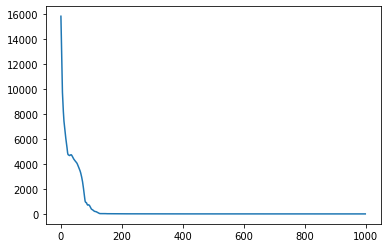

In [6]:
import torch.nn as nn
from torch import optim

model = nn.Sequential(nn.Linear(1,128),nn.ReLU(),nn.Linear(128,1))
optimizer = optim.Adam(model.parameters(),lr=0.01)

history = {'loss':[]}
for i in range(1000):
  optimizer.zero_grad()
  loss = mmd_loss(model(X),Z)
  loss.backward()
  optimizer.step()
  history['loss'].append(loss.item())
plt.plot(history['loss'])

# 訓練後再把分布視覺化

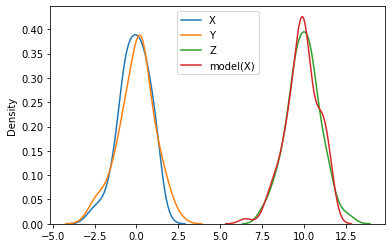

In [7]:
sns.distplot(X,label='X',hist=False)
sns.distplot(Y,label='Y',hist=False)
sns.distplot(Z,label='Z',hist=False)
sns.distplot(model(X).detach().numpy(),label='model(X)',hist=False)
plt.legend()
plt.show()